# Desafío N° 2 
## 3 - Machine Learning

### Grupo N° 5

    Integrantes:
                Arangue, Marcelo            
                Bardauil, Joaquín              
                Marquez, Hector              
                Neustadt, Alejandro       
                Pero, Felipe                                    

## Aprendizaje supervisado: Regresión lineal simple

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
# Por lo visto en el notebook Departamentos se observa una alta correlacion entre supreficies, con lo que trabajaremos
# solo con la cubierta

# Tambien vimos de trabajar con datos completos, para ver si hay mas exactitud, ya que con la base completa
# llegamos solo al R2 = 0.02 o 0.2

df_dpto = pd.read_csv('prop_apartament_not_nulls.csv', usecols=[1,2,3,4,5])
df_dpto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 5 columns):
surface_covered_in_m2    1806 non-null float64
rooms                    1806 non-null float64
floor                    1806 non-null float64
price_aprox_usd          1806 non-null float64
expenses                 1806 non-null float64
dtypes: float64(5)
memory usage: 70.6 KB


In [3]:
df_dpto.head()

,surface_covered_in_m2,rooms,floor,price_aprox_usd,expenses
0,30.0,2.0,3.0,54000.0,800.0
1,80.0,2.0,2.0,160000.0,1700.0
2,82.0,4.0,11.0,120000.0,1560.0
3,62.0,3.0,1.0,90000.0,1070.0
4,65.0,3.0,2.0,115000.0,2500.0


Visualizamos los datos haciendo un pairplot:

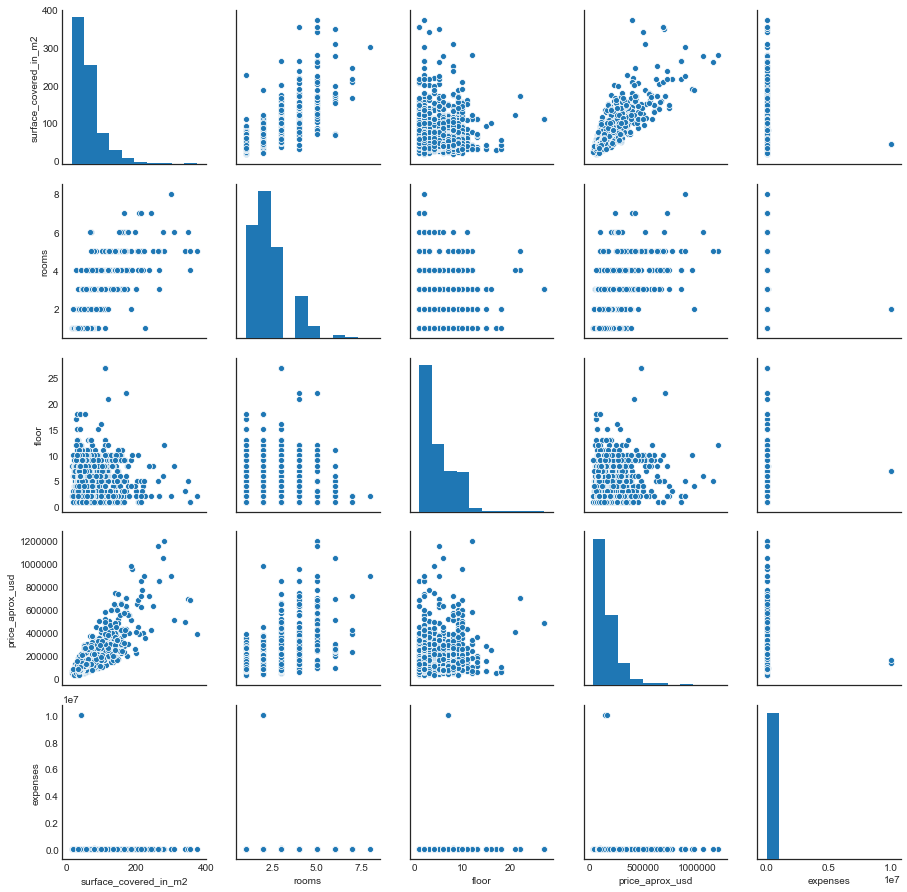

In [4]:
sns.pairplot(df_dpto);

Calculamos la matriz de correlación:

In [5]:
df_dpto.corr()

,surface_covered_in_m2,rooms,floor,price_aprox_usd,expenses
surface_covered_in_m2,1.000000,0.726321,-0.007152,0.836030,-0.013164
rooms,0.726321,1.000000,-0.043704,0.576887,-0.005049
floor,-0.007152,-0.043704,1.000000,0.129392,0.024617
price_aprox_usd,0.836030,0.576887,0.129392,1.000000,0.001846
expenses,-0.013164,-0.005049,0.024617,0.001846,1.000000


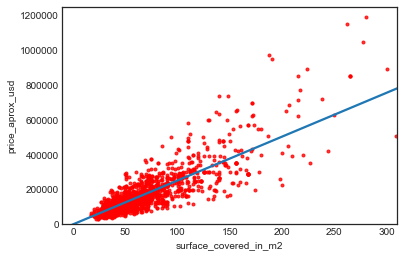

In [6]:
#https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot(df_dpto.surface_covered_in_m2, df_dpto.price_aprox_usd, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(bottom=0);

#### 1. Seleccionar una "clase de modelo"

In [7]:
from sklearn.linear_model import LinearRegression

#### 2. Elegir los hiperparámetros del modelo

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### 3. Preparar los datos en una matriz de features y un vector de target

In [9]:
# Creamos X e y

feature_cols = ['surface_covered_in_m2']
X = df_dpto[feature_cols]
y = df_dpto.price_aprox_usd

print("Shape X:", X.shape)
print("Shape y:", y.shape)
print("Type X:", type(X))
print("Type y:", type(y))

Shape X: (1806, 1)
Shape y: (1806,)
Type X: <class 'pandas.core.frame.DataFrame'>
Type y: <class 'pandas.core.series.Series'>


#### 4. Split entre set de entrenamiento y de testeo

Nos gustaría evaluar el modelo en datos que no hayan sido usados en el entrenamiento, por lo tanto vamos a dividir los datos en un *training set* y un *testing set*.

Esto podría hacerse a mano, pero es más conveniente usar la función ``train_test_split``.

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=123)

In [11]:
Xtrain.shape

(1354, 1)

In [12]:
Xtest.shape

(452, 1)

In [13]:
# habia pensado en separar el Xtest e ytest, pero como la funcion esta inicializada siempre da el mismo random, entonces
# no mete el test en el training generando overfiting
Xtest.head()

,surface_covered_in_m2
1287,35.0
653,52.0
270,52.0
1549,38.0
1572,38.0


#### 4. Ajustar el modelo a los datos

In [14]:
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
model.coef_

array([2564.06885748])

In [16]:
model.intercept_

-2734.09971607622

#### 5. Predecir etiquetas para datos desconocidos

In [17]:
# Aplicando la fórmula manualmente

test = 200

model.intercept_ + model.coef_ * test

array([510079.67177902])

In [18]:
# usando el método del objeto
import numpy as np

test_sklearn = np.array(test).reshape(-1,1)

model.predict(test_sklearn)

array([510079.67177902])

In [19]:
ypred = model.predict(Xtest)

Finalmente, podemos evaluar la bondad de ajuste utilizando las siguientes métricas:

In [20]:
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(ytest, ypred))
print ('MSE:', metrics.mean_squared_error(ytest, ypred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
print ('R2:', metrics.r2_score(ytest, ypred))

MAE: 41883.86466802233
MSE: 4267011252.2976527
RMSE: 65322.364105240806
R2: 0.7067778631632633


## statsmodels - Ordinary Least Squares (OLS)

In [21]:
est = smf.ols('price_aprox_usd ~ surface_covered_in_m2', df_dpto).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     4188.
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:13:53   Log-Likelihood:                -22658.
No. Observations:                1806   AIC:                         4.532e+04
Df Residuals:                    1804   BIC:                         4.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -521.96

In [22]:
display(est.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-521.9683,3017.741,-0.173,0.863,-6440.603,5396.667
surface_covered_in_m2,2523.0827,38.986,64.717,0.000,2446.619,2599.546


Esto indica que 10 m2 adicionales en surface_covered_in_m2, se obtiene un incremento de precio en 252 dolares

Obtuve los beta de la regresión lineal simple:

y_estimado = coef_Intercept + coef_surface_covered_in_m2 * df_dpto.surface_covered_in_m2
RSS es la suma, sobre todos las observaciones, del cuadrado de la diferencia entre y_observado, y_estimado

En este ejemplo 'y' es df_dpto.price_aprox_usd

In [23]:
est.params

Intercept                -521.968263
surface_covered_in_m2    2523.082676
dtype: float64

In [24]:
est.params['Intercept']

-521.9682626392569

In [25]:
# RSS with regression coefficients
RSS = ((df_dpto.price_aprox_usd - (est.params[0] + est.params[1]*df_dpto.surface_covered_in_m2))**2).sum()
RSS

8345284819118.205

In [26]:
est.rsquared, est.fvalue

(0.698946526263928, 4188.290929622467)

In [27]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     4188.
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:13:54   Log-Likelihood:                -22658.
No. Observations:                1806   AIC:                         4.532e+04
Df Residuals:                    1804   BIC:                         4.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -521.9683   3017.741     -0.173      0.863   -6440.603    5396.667
surface_covered_in_m2  2523.0827     38.986     64.717      0.000    2446.619    2599.546
==============================================================================
Omnibus:                      642.030   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11305.276
Skew:                           1.200   Prob(JB):                         0.00
Kurtosis:                      15.020   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regresion Lineal Múltiple

In [28]:
regr = skl_lm.LinearRegression()

X = df_dpto[['surface_covered_in_m2', 'rooms']]
y = df_dpto.price_aprox_usd

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[ 2663.84052971 -7029.68086355]
6277.870548223553


In [29]:
price_aprox_usd_pred = regr.predict(X)
r2_score(y, price_aprox_usd_pred)

0.700894723940422

In [30]:
# RSS with regression coefficients
((df_dpto.price_aprox_usd - (regr.intercept_ + regr.coef_[0]*df_dpto.surface_covered_in_m2 +\
                             regr.coef_[1]*df_dpto.rooms))**2).sum()

8291280245470.467

In [31]:
# miro los valores de estadisticos devueltos por statsmodels
est = smf.ols('price_aprox_usd ~ surface_covered_in_m2 + rooms', df_dpto).fit()
#display(est.summary())
display(est.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2112.
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:13:55   Log-Likelihood:                -22652.
No. Observations:                1806   AIC:                         4.531e+04
Df Residuals:                    1803   BIC:                         4.533e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6277.8705   3604.177      1.742      0.082    -790.932    1.33e+04
surface_covered_in_m2  2663.8405     56.551     47.105      0.000    2552.928    2774.753
rooms                 -7029.6809   2051.319     -3.427      0.001   -1.11e+04   -3006.468
==============================================================================
Omnibus:                      601.651   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11562.979
Skew:                           1.069   Prob(JB):                         0.00
Kurtosis:                      15.210   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2112.
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:13:55   Log-Likelihood:                -22652.
No. Observations:                1806   AIC:                         4.531e+04
Df Residuals:                    1803   BIC:                         4.533e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6277.87

### Usando las tres variables (surface_covered_in_m2, rooms, floor) como predictores

In [33]:
est = smf.ols('price_aprox_usd ~ surface_covered_in_m2 + rooms + floor', df_dpto).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     1534.
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:13:55   Log-Likelihood:                -22597.
No. Observations:                1806   AIC:                         4.520e+04
Df Residuals:                    1802   BIC:                         4.522e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.837e+

### Usando surface_covered_in_m2, rooms, surface_covered_in_m2*rooms

In [34]:
df_dpto['surf_cov_X_Rooms'] = df_dpto.surface_covered_in_m2 * df_dpto.rooms
df_dpto.head(5)

,surface_covered_in_m2,rooms,floor,price_aprox_usd,expenses,surf_cov_X_Rooms
0,30.0,2.0,3.0,54000.0,800.0,60.0
1,80.0,2.0,2.0,160000.0,1700.0,160.0
2,82.0,4.0,11.0,120000.0,1560.0,328.0
3,62.0,3.0,1.0,90000.0,1070.0,186.0
4,65.0,3.0,2.0,115000.0,2500.0,195.0


In [35]:
est = smf.ols('price_aprox_usd ~ surface_covered_in_m2 + rooms + surf_cov_X_Rooms', df_dpto).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     1411.
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:13:55   Log-Likelihood:                -22650.
No. Observations:                1806   AIC:                         4.531e+04
Df Residuals:                    1802   BIC:                         4.533e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3585.85